# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# Importing Neccesary Library

In [ ]:
import re
import warnings
import itertools
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Loading

In [ ]:
df = pd.read_csv('My Drive/Sos/train.csv',encoding = "ISO-8859-1")

In [ ]:
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [ ]:
df.drop(['ItemID'], axis = 1, inplace = True)


In [ ]:
df['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

# Data Preprocessing/Data Claeaning

In [ ]:
# To remove neutral responses
df['SentimentText'] = df['SentimentText'].apply(lambda x: x.lower()) # To lower 
df['SentimentText'] = df['SentimentText'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only

In [ ]:
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my apl friend
1,2,0,i missed the new moon trailer
2,3,1,omg its already 730 o
3,4,0,omgaga im sooo im gunna cry ive be...
4,5,0,i think mi bf is cheating on me ...
...,...,...,...
99984,99996,0,cupcake seems like a repeating problem hope...
99985,99997,1,cupcake__ arrrr we both replied to each other ...
99986,99998,0,cupcake_2120 ya i thought so
99987,99999,1,cupcake_dollie yes yes im glad you had more fu...


# Text Preprocessing

In [ ]:
max_fatures = 4000

tokenizer = Tokenizer(num_words = max_fatures, split=' ')
tokenizer.fit_on_texts(df['SentimentText'].values)

X = tokenizer.texts_to_sequences(df['SentimentText'].values)

X = pad_sequences(X)
Y = df['Sentiment']
L = Y.values

# Train -Test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, L, test_size=0.2,shuffle = True,stratify = L,random_state =42)

In [ ]:
X_train.shape

(79991, 90)

# Model Building

In [ ]:
embed_dim = 128
lstm_out = 196
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_fatures, 128, input_length=X_train.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(196, dropout = 0.3, recurrent_dropout = 0.3 ))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 90, 128)           512000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 90, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dropout (Dropout)            (None, 196)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               19700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [ ]:
Model = model.fit(X_train,
                         Y_train,
                         epochs=10,
                         batch_size=50,
                         validation_split = 0.2,
                         verbose = 2)

Epoch 1/10
1280/1280 - 786s - loss: 0.5329 - accuracy: 0.7315 - val_loss: 0.4937 - val_accuracy: 0.7645
Epoch 2/10
1280/1280 - 785s - loss: 0.4724 - accuracy: 0.7749 - val_loss: 0.4778 - val_accuracy: 0.7699
Epoch 3/10
1280/1280 - 784s - loss: 0.4512 - accuracy: 0.7865 - val_loss: 0.4892 - val_accuracy: 0.7732
Epoch 4/10
1280/1280 - 769s - loss: 0.4351 - accuracy: 0.7958 - val_loss: 0.4805 - val_accuracy: 0.7714
Epoch 5/10
1280/1280 - 773s - loss: 0.4224 - accuracy: 0.8018 - val_loss: 0.4825 - val_accuracy: 0.7718
Epoch 6/10
1280/1280 - 775s - loss: 0.4083 - accuracy: 0.8075 - val_loss: 0.4976 - val_accuracy: 0.7686
Epoch 7/10
1280/1280 - 777s - loss: 0.4004 - accuracy: 0.8134 - val_loss: 0.5020 - val_accuracy: 0.7682
Epoch 8/10
1280/1280 - 778s - loss: 0.3884 - accuracy: 0.8205 - val_loss: 0.5027 - val_accuracy: 0.7663
Epoch 9/10
1280/1280 - 779s - loss: 0.3785 - accuracy: 0.8257 - val_loss: 0.5211 - val_accuracy: 0.7648
Epoch 10/10
1280/1280 - 781s - loss: 0.3696 - accuracy: 0.8305 -

# Model Preformance

In [ ]:
score = model.evaluate(X_train, Y_train, verbose=False)
print("loss = ",score[0])
print("Training accuracy = ",score[1])

loss =  0.35694918036460876
Training accuracy =  0.8411571383476257


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=False)
print("loss = ",score[0])
print("Test accuracy = ",score[1])

loss =  0.5144548416137695
Test accuracy =  0.7619261741638184


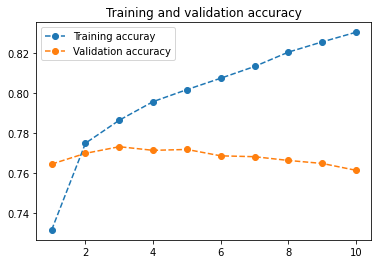

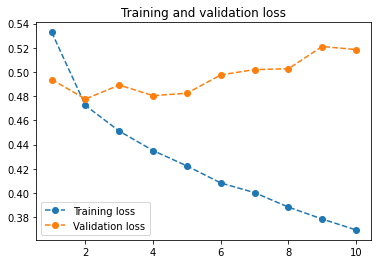

In [ ]:
# Plot train/test loss and accuracy
acc = Model.history['accuracy']
val_acc = Model.history['val_accuracy']
loss = Model.history['loss']
val_loss = Model.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, '--o', label='Training accuray')
plt.plot(epochs, val_acc, '--o', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, '--o', label='Training loss')
plt.plot(epochs, val_loss, '--o', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

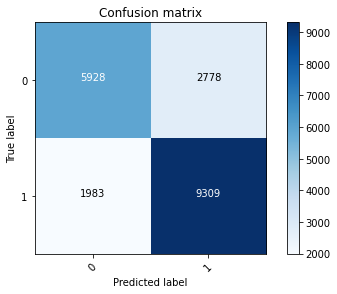

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
confusion_mtx = confusion_matrix(Y_test, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

### Sample Prediction

In [ ]:
sample = ['@ANIJun 7 Delhi Medical Association strongly condemns the way Delhi CM is warning the doctors & threatening hospitals about #COVID19 patients admissions&tests. FIR on Sir Ganga Ram Hospital is highly condemnable and demoralizing for the whole medical fraternity: Delhi Medical Association']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=90, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0  756    2  131   10 3538    2 2620   54 3132   17 1060 1191
    10 2083    7    9    2  504]]
1/1 - 0s
negative
